<a href="https://colab.research.google.com/github/tpratap/GRIPJune2021/blob/main/Task_01_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Sparks Foundation #GRIPJune2021**



## **Supervised Machine Learning**
Supervised Learning is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately. 
Supervised learning can be separated into two types of problems when data mining—classification and regression:

**Classification** uses an algorithm to accurately assign test data into specific categories.
**Regression** is used to understand the relationship between dependent and independent variables.
In this noteook, we will we working on regression.

### **Prediction using supervised ML**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### By:- Tej Pratap

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

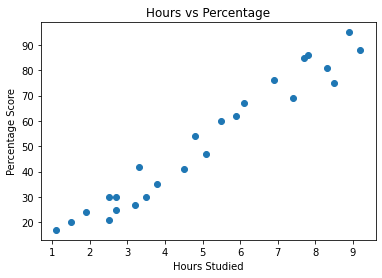

In [4]:
plt.title('Hours vs Percentage')
plt.scatter(data.Hours, data.Scores)
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [5]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

### **Training the Algorithm**
Using sklearn package to model data.

In [6]:
# Modelling 
from sklearn import linear_model
regr = linear_model.LinearRegression()
print("Model is created");

Model is created


In [7]:
## Labelling Train Data
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
print("Labelling of train data completed")

Labelling of train data completed


Fitting the data into model

In [8]:
# Fitting Train data into Model
regr.fit (train_x, train_y)
print("Training Complete.")

Training Complete.


In [9]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.94223838]]
Intercept:  [1.71080577]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.

## Plotting regression line 

we can plot the fit line over the train data:

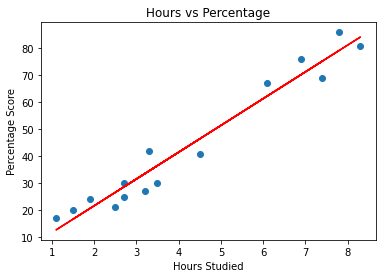

In [10]:
plt.title('Hours vs Percentage')
plt.scatter(train.Hours, train.Scores)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()


Labelling of Test data

In [11]:
# Labeling of test data
test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
print("Labelling of test data completed")

Labelling of test data completed


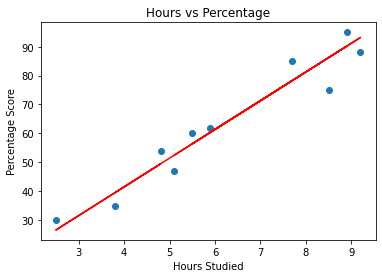

In [12]:
# Plotting the test data with fitted regression line
plt.title('Hours vs Percentage')
plt.scatter(test.Hours, test.Scores)
plt.plot(test_x, regr.coef_[0][0]*test_x + regr.intercept_[0], '-r')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

we can fit the regression line over test data

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
test_y_pred = regr.predict(test_x)
print("Prediction for test data completed")

Prediction for test data completed


In [14]:
data = {'Hours': test_x.flatten(), 'Actual Scores': test_y.flatten(), 'Predicted Scores': test_y_pred.flatten()}
df = pd.DataFrame(data)
df

,Hours,Actual Scores,Predicted Scores
0,5.1,47,52.416222
1,8.5,75,86.219832
2,9.2,88,93.179399
3,5.5,60,56.393117
4,7.7,85,78.266041
5,5.9,62,60.370012
6,8.9,95,90.196727
7,2.5,30,26.566402
8,4.8,54,49.433550
9,3.8,35,39.491312


In [15]:
# Prediction using our data
hours = 9.25
own_pred = regr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0][0]))

No of Hours = 9.25
Predicted Score = 93.67651081220234


### **Evaluating the model**
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [16]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_pred , test_y))

Mean absolute error: 5.11
Residual sum of squares (MSE): 31.89
R2-score: 0.93
